## Метод ftbs?для транспортных потоков

In [3]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [25]:
def rho_green_light(nx, rho_light):
    """Computes "green light" initial condition with shock, and linear distribution behind

    Parameters
    ----------
    nx        : int
        Number of grid points in x
    rho_light : float
        Density of cars at stoplight

    Returns
    -------
    rho: array of floats
        Array with initial values of density
    """    
    rho = numpy.arange(nx)*2./nx*5  # Before stoplight
    rho[int((nx-1)/2):] = 0
    
    return rho

In [26]:
#Basic initial condition parameters
#defining grid size, time steps
nx = 81
nt = 30
dx = 4.0/(nx-1)

x = numpy.linspace(0,4,nx)

rho_max = 10.
u_max = 1.
rho_light = 10.

rho = rho_green_light(nx, rho_light)

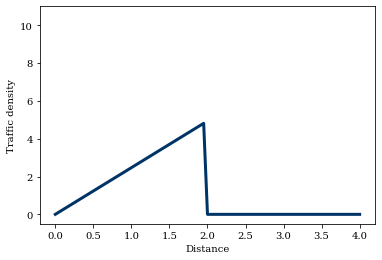

In [27]:
pyplot.plot(x, rho, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5,11.);

In [28]:
def computeF(u_max, rho_max, rho):
    """Computes flux F=V*rho

    Parameters
    ----------
    u_max  : float
        Maximum allowed velocity
    rho    : array of floats
        Array with density of cars at every point x
    rho_max: float
        Maximum allowed car density
        
    Returns
    -------
    F : array
        Array with flux at every point x
    """
    return u_max*rho*(1-rho/rho_max)

In [29]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    """ Computes the solution with forward in time, backward in space
    
    Parameters
    ----------
    rho    : array of floats
            Density at current time-step
    nt     : int
            Number of time steps
    dt     : float
            Time-step size
    dx     : float
            Mesh spacing
    rho_max: float
            Maximum allowed car density
    u_max  : float
            Speed limit
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho)))      
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()              
    
    for t in range(1,nt):
        F = computeF(u_max, rho_max, rho)
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho_n[t,0] = rho[0]
        rho = rho_n[t].copy()

    return rho_n

In [30]:
sigma = .5
dt = sigma*dx

rho_n = ftbs(rho, nt, dt, dx, rho_max, u_max)

In [31]:
from matplotlib import animation
from IPython.display import HTML

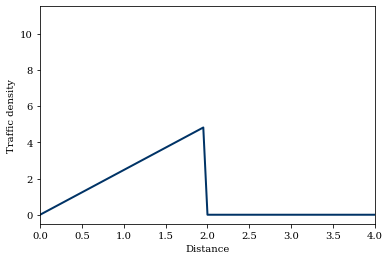

In [32]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-.5,11.5),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)

In [33]:
HTML(anim.to_html5_video())

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

def df_burgers(u):
    """The derivative of the flux function, here defined for Burger's equation."""
    
    return u

In [38]:
def plot_characteristics(df, ul, ur):
    """Plot the characteristic lines for the initial data of a scalar Riemann problem."""
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    du = np.max([abs(ur-ul), 0.1])
    umin = np.min([ul, ur])
    umax = np.max([ul, ur])
    ax1.plot([-1.0, 0.0], [ul, ul], 'b-', lw=2)
    ax1.plot([0.0, 1.0], [ur, ur], 'g-',lw=2)
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(umin - 0.1*du, umax + 0.1*du)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$u(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = df(ul)
    slope_r = df(ur)
    left_edge = np.min([-1.0, -1.0 - slope_l])
    right_edge = np.max([1.0, 1.0 - slope_r])
    x_start_points_l = np.linspace(left_edge, 0.0, 20)
    x_start_points_r = np.linspace(0.0, right_edge, 20) 
    x_end_points_l = x_start_points_l + slope_l
    x_end_points_r = x_start_points_r + slope_r
    
    for xs, xe in zip(x_start_points_l, x_end_points_l):
        ax2.plot([xs, xe], [0.0, 1.0], 'b-')
    for xs, xe in zip(x_start_points_r, x_end_points_r):
        ax2.plot([xs, xe], [0.0, 1.0], 'g-')
        
    x_fill = [x_end_points_l[-1], x_start_points_l[-1], x_end_points_r[0]]
    t_fill = [1.0, 0.0, 1.0]
    ax2.fill_between(x_fill, t_fill, 1.0, facecolor = 'red', alpha = 0.5)
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()

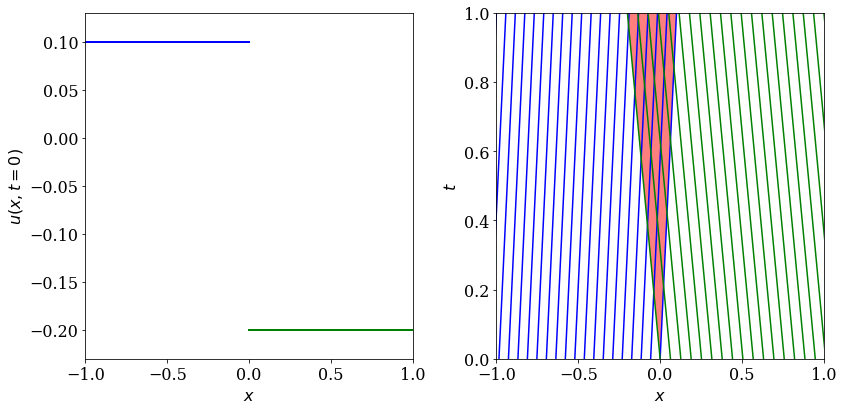

In [39]:
plot_characteristics(df_burgers, 0.1, -0.2)

In [40]:
from ipywidgets import interactive, FloatSlider
def interactive_characteristics(ul, ur):
    return plot_characteristics(df_burgers, ul, ur)
interactive(interactive_characteristics, 
            ul = FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.1), 
            ur = FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.2))

interactive(children=(FloatSlider(value=0.1, description='ul', max=2.0, min=-2.0), FloatSlider(value=-0.2, des…

In [41]:
def plot_shock_burgers(ul, ur):
    """Plot the characteristic lines for the shock solution to Burger's equation."""
    
    assert(ul > ur)
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    du = np.max([abs(ur-ul), 0.1])
    umin = np.min([ul, ur])
    umax = np.max([ul, ur])
    ax1.plot([-1.0, 0.0], [ul, ul], 'b-',lw=2)
    ax1.plot([0.0, 1.0], [ur, ur], 'g-',lw=2)
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(umin - 0.1*du, umax + 0.1*du)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$u(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = ul
    slope_r = ur
    s = 0.5 * (ur + ul)
    ax2.plot([0.0, s], [0.0, 1.0], 'k-', linewidth=3)
    
    left_edge = np.min([-1.0, -1.0 - slope_l])
    right_edge = np.max([1.0, 1.0 - slope_r])
    x_start_points_l = np.linspace(left_edge, 0.0, 20)
    x_start_points_r = np.linspace(0.0, right_edge, 20) 
    t_end_points_l = np.ones_like(x_start_points_l)
    t_end_points_r = np.ones_like(x_start_points_r)
    
    # Look for intersections
    t_end_points_l = np.minimum(t_end_points_l, x_start_points_l / (s - slope_l))
    t_end_points_r = np.minimum(t_end_points_r, x_start_points_r / (s - slope_r))
    x_end_points_l = x_start_points_l + slope_l * t_end_points_l
    x_end_points_r = x_start_points_r + slope_r * t_end_points_r
    
    for xs, xe, te in zip(x_start_points_l, x_end_points_l, t_end_points_l):
        ax2.plot([xs, xe], [0.0, te], 'b-')
    for xs, xe, te in zip(x_start_points_r, x_end_points_r, t_end_points_r):
        ax2.plot([xs, xe], [0.0, te], 'g-')
    
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()

In [42]:
interactive(plot_shock_burgers, 
            ul = FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.1), 
            ur = FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.2))

interactive(children=(FloatSlider(value=0.1, description='ul', max=2.0, min=-2.0), FloatSlider(value=-0.2, des…

In [43]:
def plot_rarefaction_burgers(ul, ur):
    """Plot the characteristic lines for the rarefaction solution to Burger's equation."""
    
    assert(ul < ur)
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    du = np.max([abs(ur-ul), 0.1])
    umin = np.min([ul, ur])
    umax = np.max([ul, ur])
    ax1.plot([-1.0, 0.0], [ul, ul], 'b-',lw=2)
    ax1.plot([0.0, 1.0], [ur, ur], 'g-',lw=2)
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(umin - 0.1*du, umax + 0.1*du)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$u(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = ul
    slope_r = ur
    
    left_edge = np.min([-1.0, -1.0 - slope_l])
    right_edge = np.max([1.0, 1.0 - slope_r])
    x_start_points_l = np.linspace(left_edge, 0.0, 20)
    x_start_points_r = np.linspace(0.0, right_edge, 20)
    x_end_points_l = x_start_points_l + slope_l
    x_end_points_r = x_start_points_r + slope_r
    
    # Rarefaction wave
    xi_l = ul
    xi_r = ur
    xi = np.linspace(xi_l, xi_r, 7)
    x_end_rarefaction = xi
    
    for xs, xe in zip(x_start_points_l, x_end_points_l):
        ax2.plot([xs, xe], [0.0, 1.0], 'b-')
    for xs, xe in zip(x_start_points_r, x_end_points_r):
        ax2.plot([xs, xe], [0.0, 1.0], 'g-')
    for xe in x_end_rarefaction:
        ax2.plot([0.0, xe], [0.0, 1.0], 'r--')
    
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()

In [44]:
def plot_solution_burgers(ul, ur):
    """Plot the characteristic lines for the full solution to Burger's equation."""
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    du = np.max([abs(ur-ul), 0.1])
    umin = np.min([ul, ur])
    umax = np.max([ul, ur])
    ax1.plot([-1.0, 0.0], [ul, ul], 'b-',lw=2)
    ax1.plot([0.0, 1.0], [ur, ur], 'g-',lw=2)
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(umin - 0.1*du, umax + 0.1*du)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$u(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = ul
    slope_r = ur
    
    if (ul <= ur):
        # Rarefaction case
        
        left_edge = np.min([-1.0, -1.0 - slope_l])
        right_edge = np.max([1.0, 1.0 - slope_r])
        x_start_points_l = np.linspace(left_edge, 0.0, 20)
        x_start_points_r = np.linspace(0.0, right_edge, 20)
        x_end_points_l = x_start_points_l + slope_l
        x_end_points_r = x_start_points_r + slope_r
    
        # Rarefaction wave
        xi_l = ul
        xi_r = ur
        xi = np.linspace(xi_l, xi_r, 7)
        x_end_rarefaction = xi
    
        for xs, xe in zip(x_start_points_l, x_end_points_l):
            ax2.plot([xs, xe], [0.0, 1.0], 'b-')
        for xs, xe in zip(x_start_points_r, x_end_points_r):
            ax2.plot([xs, xe], [0.0, 1.0], 'g-')
        for xe in x_end_rarefaction:
            ax2.plot([0.0, xe], [0.0, 1.0], 'r--')
    else:
        # Shock case
        s = 0.5 * (ur + ul)
        ax2.plot([0.0, s], [0.0, 1.0], 'k-', linewidth=3)
    
        left_edge = np.min([-1.0, -1.0 - slope_l])
        right_edge = np.max([1.0, 1.0 - slope_r])
        x_start_points_l = np.linspace(left_edge, 0.0, 20)
        x_start_points_r = np.linspace(0.0, right_edge, 20) 
        t_end_points_l = np.ones_like(x_start_points_l)
        t_end_points_r = np.ones_like(x_start_points_r)
    
        # Look for intersections
        t_end_points_l = np.minimum(t_end_points_l, x_start_points_l / (s - slope_l))
        t_end_points_r = np.minimum(t_end_points_r, x_start_points_r / (s - slope_r))
        x_end_points_l = x_start_points_l + slope_l * t_end_points_l
        x_end_points_r = x_start_points_r + slope_r * t_end_points_r
    
        for xs, xe, te in zip(x_start_points_l, x_end_points_l, t_end_points_l):
            ax2.plot([xs, xe], [0.0, te], 'b-')
        for xs, xe, te in zip(x_start_points_r, x_end_points_r, t_end_points_r):
            ax2.plot([xs, xe], [0.0, te], 'g-')
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()
        